In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('alz.csv')
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [2]:
def grab_cols(df):
    num_cols = list(df.select_dtypes(include="number"))
    cat_cols = [col for col in df.columns if col not in num_cols]
    num_but_cat = [col for col in num_cols if df[col].nunique()<25]
    cat_but_car = [col for col in cat_cols if df[col].nunique() >25]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"cat_cols = {cat_cols}")
    print(f"num_cols = {num_cols}")
    print(f"num_but_cat = {num_but_cat}")
    print(f"cat_but_car= {cat_but_car}")
    return cat_cols,num_cols,cat_but_car,num_but_cat
cat_cols,num_cols,cat_but_car,num_but_cat = grab_cols(df)

cat_cols = ['Country', 'Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level', 'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure', 'Employment Status', 'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living', 'Alzheimer’s Diagnosis', 'Education Level']
num_cols = ['Age', 'BMI', 'Cognitive Test Score']
num_but_cat = ['Education Level']
cat_but_car= []


In [3]:
df[num_but_cat+num_cols]

,Education Level,Age,BMI,Cognitive Test Score
0,1,90,33.0,90
1,7,72,29.9,65
2,19,86,22.9,43
3,17,53,31.2,81
4,3,58,30.0,49
...,...,...,...,...
74278,3,60,22.6,42
74279,18,58,30.6,42
74280,13,57,28.2,61
74281,7,73,29.0,97


In [4]:
df[cat_cols]

,Country,Gender,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Depression Level,...,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis,Education Level
0,Spain,Male,Medium,Never,Occasionally,No,No,Normal,No,Low,...,High,Retired,Single,No,Low,Medium,High,Urban,No,1
1,Argentina,Male,Medium,Former,Never,No,No,Normal,No,Low,...,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No,7
2,South Africa,Female,High,Current,Occasionally,No,Yes,Normal,No,High,...,Medium,Employed,Single,No,Low,Medium,High,Rural,No,19
3,China,Male,Low,Never,Regularly,Yes,No,Normal,No,Medium,...,Medium,Retired,Single,No,High,Medium,Low,Rural,No,17
4,Sweden,Female,High,Former,Never,Yes,No,Normal,No,High,...,High,Employed,Married,No,Low,Medium,High,Rural,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,Female,High,Former,Never,No,No,High,No,Medium,...,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No,3
74279,UK,Male,Low,Never,Occasionally,Yes,No,Normal,No,Low,...,Medium,Unemployed,Single,No,Medium,High,High,Rural,No,18
74280,Spain,Female,Medium,Never,Regularly,No,No,High,Yes,Low,...,Low,Employed,Single,Yes,High,Low,Low,Rural,No,13
74281,Brazil,Female,Low,Never,Regularly,No,No,High,No,High,...,Low,Employed,Widowed,No,Low,Low,High,Rural,No,7


In [5]:
df.select_dtypes(exclude="number")

,Country,Gender,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Depression Level,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,Male,Medium,Never,Occasionally,No,No,Normal,No,Low,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,Male,Medium,Former,Never,No,No,Normal,No,Low,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,Female,High,Current,Occasionally,No,Yes,Normal,No,High,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,Male,Low,Never,Regularly,Yes,No,Normal,No,Medium,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,Female,High,Former,Never,Yes,No,Normal,No,High,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,Female,High,Former,Never,No,No,High,No,Medium,...,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,Male,Low,Never,Occasionally,Yes,No,Normal,No,Low,...,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74280,Spain,Female,Medium,Never,Regularly,No,No,High,Yes,Low,...,Healthy,Low,Employed,Single,Yes,High,Low,Low,Rural,No
74281,Brazil,Female,Low,Never,Regularly,No,No,High,No,High,...,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


In [6]:
df.select_dtypes(exclude="number").nunique() <3 

Country                                 False
Gender                                   True
Physical Activity Level                 False
Smoking Status                          False
Alcohol Consumption                     False
Diabetes                                 True
Hypertension                             True
Cholesterol Level                        True
Family History of Alzheimer’s            True
Depression Level                        False
Sleep Quality                           False
Dietary Habits                          False
Air Pollution Exposure                  False
Employment Status                       False
Marital Status                          False
Genetic Risk Factor (APOE-ε4 allele)     True
Social Engagement Level                 False
Income Level                            False
Stress Levels                           False
Urban vs Rural Living                    True
Alzheimer’s Diagnosis                    True
dtype: bool

In [7]:
pd.crosstab(df['Alzheimer’s Diagnosis'],df['Sleep Quality'] )

Sleep Quality,Average,Good,Poor
Alzheimer’s Diagnosis,,,
No,14497,14765,14308
Yes,10218,10380,10115


In [8]:
df['Alzheimer’s Diagnosis']

0        No
1        No
2        No
3        No
4        No
         ..
74278    No
74279    No
74280    No
74281    No
74282    No
Name: Alzheimer’s Diagnosis, Length: 74283, dtype: object

In [9]:
df['Income Level'].value_counts()

Income Level
Low       24873
High      24848
Medium    24562
Name: count, dtype: int64

In [10]:
binary_cols = [col for col in df.select_dtypes(exclude="number").columns if df[col].nunique() < 3]
binary_cols

['Gender',
 'Diabetes',
 'Hypertension',
 'Cholesterol Level',
 'Family History of Alzheimer’s',
 'Genetic Risk Factor (APOE-ε4 allele)',
 'Urban vs Rural Living',
 'Alzheimer’s Diagnosis']

In [11]:
df[binary_cols]

,Gender,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Genetic Risk Factor (APOE-ε4 allele),Urban vs Rural Living,Alzheimer’s Diagnosis
0,Male,No,No,Normal,No,No,Urban,No
1,Male,No,No,Normal,No,No,Urban,No
2,Female,No,Yes,Normal,No,No,Rural,No
3,Male,Yes,No,Normal,No,No,Rural,No
4,Female,Yes,No,Normal,No,No,Rural,No
...,...,...,...,...,...,...,...,...
74278,Female,No,No,High,No,No,Rural,No
74279,Male,Yes,No,Normal,No,No,Rural,No
74280,Female,No,No,High,Yes,Yes,Rural,No
74281,Female,No,No,High,No,No,Rural,No


In [12]:

df["Cholesterol Level"] = df["Cholesterol Level"].map({"Normal": 0, "High": 1})

In [13]:
df["Cholesterol Level"] 

0        0
1        0
2        0
3        0
4        0
        ..
74278    1
74279    0
74280    1
74281    1
74282    0
Name: Cholesterol Level, Length: 74283, dtype: int64

In [14]:
binary_cols = ['Gender',
 'Diabetes',
 'Hypertension',
 'Family History of Alzheimer’s',
 'Genetic Risk Factor (APOE-ε4 allele)',
 'Urban vs Rural Living',
 'Alzheimer’s Diagnosis']

In [15]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(df, col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Column: {col} -> {mapping}")
    

for c in binary_cols:
    label_encoder(df, c)

Column: Gender -> {'Female': 0, 'Male': 1}
Column: Diabetes -> {'No': 0, 'Yes': 1}
Column: Hypertension -> {'No': 0, 'Yes': 1}
Column: Family History of Alzheimer’s -> {'No': 0, 'Yes': 1}
Column: Genetic Risk Factor (APOE-ε4 allele) -> {'No': 0, 'Yes': 1}
Column: Urban vs Rural Living -> {'Rural': 0, 'Urban': 1}
Column: Alzheimer’s Diagnosis -> {'No': 0, 'Yes': 1}


In [16]:
df[cat_cols].select_dtypes(exclude="number")

,Country,Physical Activity Level,Smoking Status,Alcohol Consumption,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Social Engagement Level,Income Level,Stress Levels
0,Spain,Medium,Never,Occasionally,Low,Poor,Healthy,High,Retired,Single,Low,Medium,High
1,Argentina,Medium,Former,Never,Low,Good,Healthy,Medium,Unemployed,Widowed,High,Low,High
2,South Africa,High,Current,Occasionally,High,Good,Average,Medium,Employed,Single,Low,Medium,High
3,China,Low,Never,Regularly,Medium,Average,Healthy,Medium,Retired,Single,High,Medium,Low
4,Sweden,High,Former,Never,High,Poor,Unhealthy,High,Employed,Married,Low,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,High,Former,Never,Medium,Poor,Average,High,Unemployed,Widowed,Medium,High,Medium
74279,UK,Low,Never,Occasionally,Low,Poor,Average,Medium,Unemployed,Single,Medium,High,High
74280,Spain,Medium,Never,Regularly,Low,Good,Healthy,Low,Employed,Single,High,Low,Low
74281,Brazil,Low,Never,Regularly,High,Good,Healthy,Low,Employed,Widowed,Low,Low,High


In [17]:
list(df[cat_cols].select_dtypes(exclude="number"))

['Country',
 'Physical Activity Level',
 'Smoking Status',
 'Alcohol Consumption',
 'Depression Level',
 'Sleep Quality',
 'Dietary Habits',
 'Air Pollution Exposure',
 'Employment Status',
 'Marital Status',
 'Social Engagement Level',
 'Income Level',
 'Stress Levels']

In [18]:
ordinal_cols = [
 'Physical Activity Level',
 'Depression Level',
 'Sleep Quality',
 'Dietary Habits',
 'Air Pollution Exposure',
 'Social Engagement Level',
 'Income Level',
 'Stress Levels']

df['Physical Activity Level'] = df['Physical Activity Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Depression Level'] = df['Depression Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Sleep Quality'] = df['Sleep Quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})
df['Dietary Habits'] = df['Dietary Habits'].map({'Unhealthy': 0, 'Average': 1, 'Healthy': 2})
df['Air Pollution Exposure'] = df['Air Pollution Exposure'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Social Engagement Level'] = df['Social Engagement Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Income Level'] = df['Income Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Stress Levels'] = df['Stress Levels'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [19]:
df.select_dtypes(exclude="number")

,Country,Smoking Status,Alcohol Consumption,Employment Status,Marital Status
0,Spain,Never,Occasionally,Retired,Single
1,Argentina,Former,Never,Unemployed,Widowed
2,South Africa,Current,Occasionally,Employed,Single
3,China,Never,Regularly,Retired,Single
4,Sweden,Former,Never,Employed,Married
...,...,...,...,...,...
74278,Russia,Former,Never,Unemployed,Widowed
74279,UK,Never,Occasionally,Unemployed,Single
74280,Spain,Never,Regularly,Employed,Single
74281,Brazil,Never,Regularly,Employed,Widowed


In [20]:
ohe_cols = ['Country',
 'Smoking Status',
 'Alcohol Consumption',
 'Employment Status',
 'Marital Status']

In [21]:
def ohe(dataframe,ohe_cols):
    dataframe = pd.get_dummies(dataframe,columns=ohe_cols,drop_first=False,dtype=int)
    return dataframe

df_test = ohe(df,ohe_cols)

df_test

,Age,Gender,Education Level,BMI,Physical Activity Level,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,...,Smoking Status_Never,Alcohol Consumption_Never,Alcohol Consumption_Occasionally,Alcohol Consumption_Regularly,Employment Status_Employed,Employment Status_Retired,Employment Status_Unemployed,Marital Status_Married,Marital Status_Single,Marital Status_Widowed
0,90,1,1,33.0,1,0,0,0,0,90,...,1,0,1,0,0,1,0,0,1,0
1,72,1,7,29.9,1,0,0,0,0,65,...,0,1,0,0,0,0,1,0,0,1
2,86,0,19,22.9,2,0,1,0,0,43,...,0,0,1,0,1,0,0,0,1,0
3,53,1,17,31.2,0,1,0,0,0,81,...,1,0,0,1,0,1,0,0,1,0
4,58,0,3,30.0,2,1,0,0,0,49,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,60,0,3,22.6,2,0,0,1,0,42,...,0,1,0,0,0,0,1,0,0,1
74279,58,1,18,30.6,0,1,0,0,0,42,...,1,0,1,0,0,0,1,0,1,0
74280,57,0,13,28.2,1,0,0,1,1,61,...,1,0,0,1,1,0,0,0,1,0
74281,73,0,7,29.0,0,0,0,1,0,97,...,1,0,0,1,1,0,0,0,0,1


<Axes: xlabel='Alzheimer’s Diagnosis'>

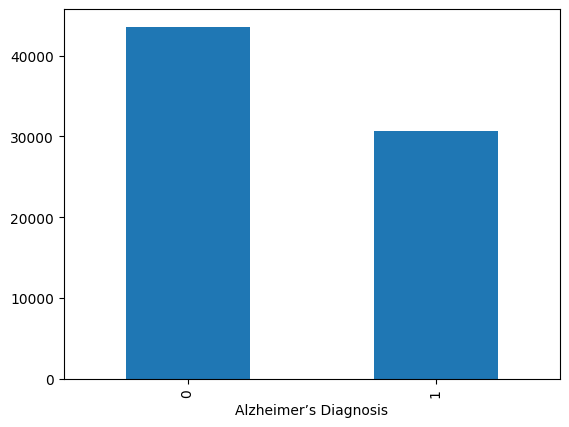

In [22]:
df['Alzheimer’s Diagnosis'].value_counts().plot(kind='bar')

In [23]:
X = df_test.drop(columns='Alzheimer’s Diagnosis')
y = df_test['Alzheimer’s Diagnosis']

In [ ]:
df_test

,Age,Gender,Education Level,BMI,Physical Activity Level,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,...,Smoking Status_Never,Alcohol Consumption_Never,Alcohol Consumption_Occasionally,Alcohol Consumption_Regularly,Employment Status_Employed,Employment Status_Retired,Employment Status_Unemployed,Marital Status_Married,Marital Status_Single,Marital Status_Widowed
0,90,1,1,33.0,1,0,0,0,0,90,...,1,0,1,0,0,1,0,0,1,0
1,72,1,7,29.9,1,0,0,0,0,65,...,0,1,0,0,0,0,1,0,0,1
2,86,0,19,22.9,2,0,1,0,0,43,...,0,0,1,0,1,0,0,0,1,0
3,53,1,17,31.2,0,1,0,0,0,81,...,1,0,0,1,0,1,0,0,1,0
4,58,0,3,30.0,2,1,0,0,0,49,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,60,0,3,22.6,2,0,0,1,0,42,...,0,1,0,0,0,0,1,0,0,1
74279,58,1,18,30.6,0,1,0,0,0,42,...,1,0,1,0,0,0,1,0,1,0
74280,57,0,13,28.2,1,0,0,1,1,61,...,1,0,0,1,1,0,0,0,1,0
74281,73,0,7,29.0,0,0,0,1,0,97,...,1,0,0,1,1,0,0,0,0,1


In [119]:
from sklearn.feature_selection import mutual_info_classif

discrete_mask = []
for col in X.columns:
    # Örnek bir mantık: eğer sütunda unique değer sayısı 10’dan azsa kategorik (True),
    # yoksa sayısal (False). Ya da dtype kontrolü yapabilirsiniz.
    if X[col].nunique() < 21:
        discrete_mask.append(True)
    else:
        discrete_mask.append(False)

mi_scores = mutual_info_classif(X, y, discrete_features=discrete_mask)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
mi_series

Age                                     1.069077e-01
Genetic Risk Factor (APOE-ε4 allele)    1.866059e-02
Family History of Alzheimer’s           9.842455e-03
Country_Russia                          9.021600e-04
Country_India                           8.703773e-04
Country_South Africa                    7.245759e-04
Country_Japan                           6.144210e-04
Country_Brazil                          5.806342e-04
Country_Canada                          5.741182e-04
Country_Sweden                          5.596817e-04
Country_Mexico                          5.261589e-04
Country_Norway                          4.477904e-04
Education Level                         2.012194e-04
Country_China                           7.713822e-05
Country_USA                             6.585373e-05
Country_Italy                           4.402200e-05
Income Level                            2.421670e-05
Country_Spain                           1.978809e-05
Country_France                          1.8148

/var/folders/80/9ytsrtbj0bgbwgqlkgw86mdc0000gn/T/ipykernel_2000/3103893091.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_mi.values, y=top_20_mi.index, palette='rocket')


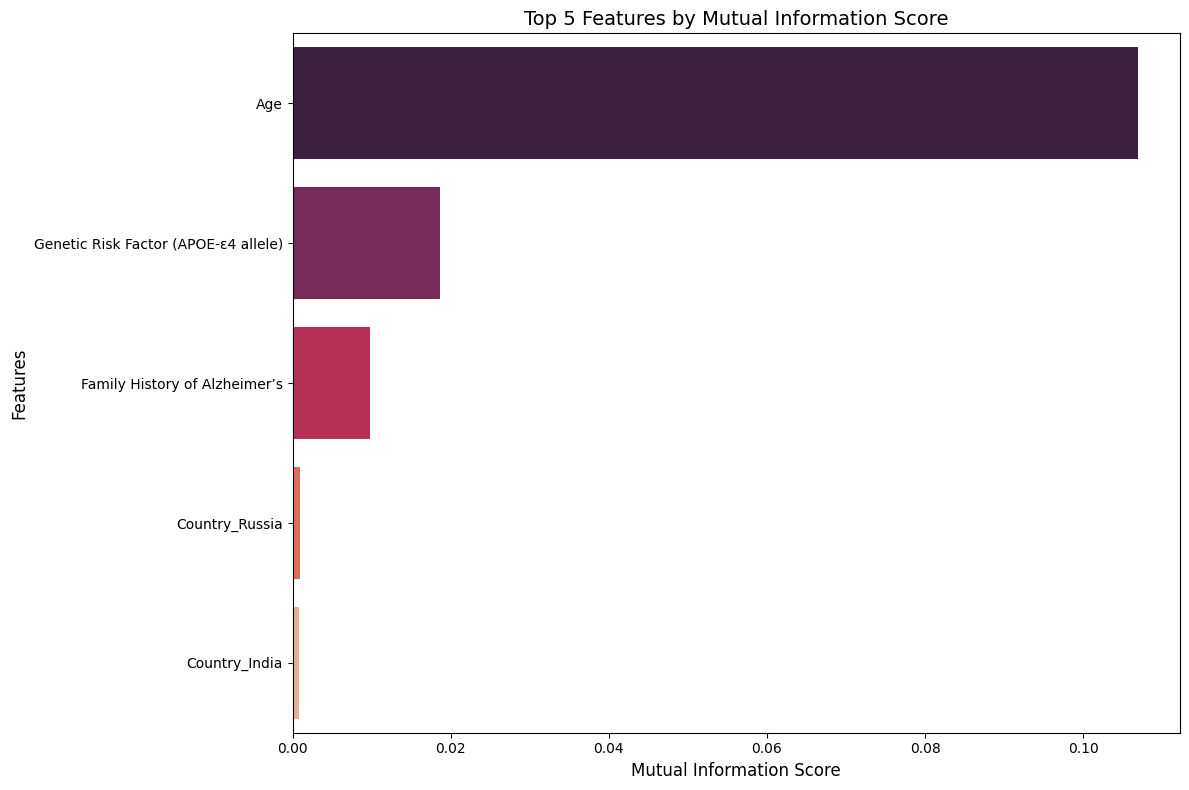

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# İlk 20 özelliği alalım
top_20_mi = mi_series.head(5)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_mi.values, y=top_20_mi.index, palette='rocket')

plt.title('Top 5 Features by Mutual Information Score', fontsize=14)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=10,n_estimators=200,max_depth=6)

model.fit(X, y)

importances = model.feature_importances_
importance_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
importance_series

Age                                     0.638558
Genetic Risk Factor (APOE-ε4 allele)    0.176752
Family History of Alzheimer’s           0.101907
Country_India                           0.008171
Country_Russia                          0.008056
Country_South Africa                    0.006560
BMI                                     0.005379
Country_Brazil                          0.005185
Country_Japan                           0.004995
Cognitive Test Score                    0.004703
Country_Mexico                          0.004220
Country_Canada                          0.004168
Country_Sweden                          0.004055
Education Level                         0.003349
Country_Norway                          0.003262
Social Engagement Level                 0.001293
Income Level                            0.001247
Stress Levels                           0.001203
Physical Activity Level                 0.001118
Dietary Habits                          0.001096
Depression Level    

/var/folders/80/9ytsrtbj0bgbwgqlkgw86mdc0000gn/T/ipykernel_2000/3841314424.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_features.values, y=top_20_features.index, palette='mako')


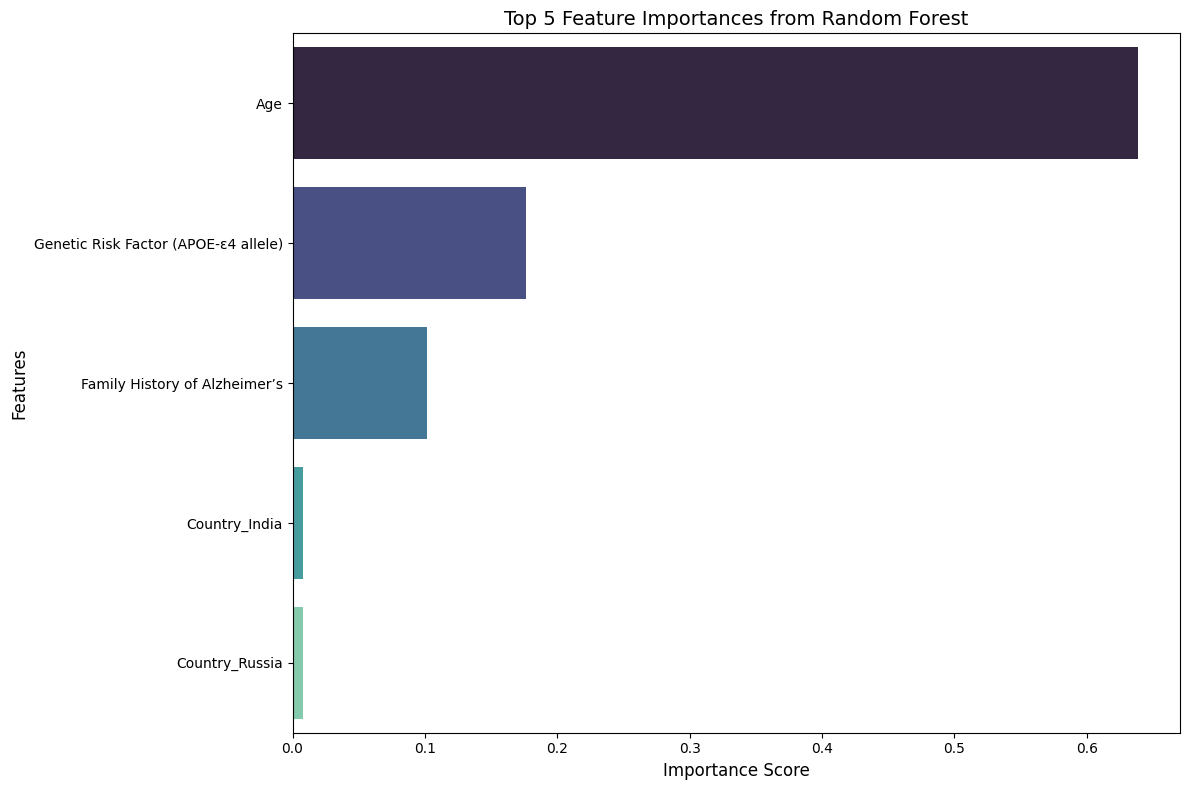

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# İlk 20 özelliği alalım
top_20_features = importance_series.head(5)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_features.values, y=top_20_features.index, palette='mako')

plt.title('Top 5 Feature Importances from Random Forest', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

tablo = pd.crosstab(df_test["Alzheimer’s Diagnosis"], df_test["Country_Japan"])
chi2, p, dof, expected = chi2_contingency(tablo)

In [29]:
df_test.columns

Index(['Age', 'Gender', 'Education Level', 'BMI', 'Physical Activity Level',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Genetic Risk Factor (APOE-ε4 allele)',
       'Social Engagement Level', 'Income Level', 'Stress Levels',
       'Urban vs Rural Living', 'Alzheimer’s Diagnosis', 'Country_Argentina',
       'Country_Australia', 'Country_Brazil', 'Country_Canada',
       'Country_China', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Italy', 'Country_Japan', 'Country_Mexico', 'Country_Norway',
       'Country_Russia', 'Country_Saudi Arabia', 'Country_South Africa',
       'Country_South Korea', 'Country_Spain', 'Country_Sweden', 'Country_UK',
       'Country_USA', 'Smoking Status_Current', 'Smoking Status_Former',
       'Smoking Status_Never', 'Alcohol Consumption_Never',
       'Alcohol Con

In [30]:
df_test

,Age,Gender,Education Level,BMI,Physical Activity Level,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,...,Smoking Status_Never,Alcohol Consumption_Never,Alcohol Consumption_Occasionally,Alcohol Consumption_Regularly,Employment Status_Employed,Employment Status_Retired,Employment Status_Unemployed,Marital Status_Married,Marital Status_Single,Marital Status_Widowed
0,90,1,1,33.0,1,0,0,0,0,90,...,1,0,1,0,0,1,0,0,1,0
1,72,1,7,29.9,1,0,0,0,0,65,...,0,1,0,0,0,0,1,0,0,1
2,86,0,19,22.9,2,0,1,0,0,43,...,0,0,1,0,1,0,0,0,1,0
3,53,1,17,31.2,0,1,0,0,0,81,...,1,0,0,1,0,1,0,0,1,0
4,58,0,3,30.0,2,1,0,0,0,49,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,60,0,3,22.6,2,0,0,1,0,42,...,0,1,0,0,0,0,1,0,0,1
74279,58,1,18,30.6,0,1,0,0,0,42,...,1,0,1,0,0,0,1,0,1,0
74280,57,0,13,28.2,1,0,0,1,1,61,...,1,0,0,1,1,0,0,0,1,0
74281,73,0,7,29.0,0,0,0,1,0,97,...,1,0,0,1,1,0,0,0,0,1


In [34]:
creamer_cols = [col for col in df_test.columns if df_test[col].nunique() < 21]
creamer_cols

['Gender',
 'Education Level',
 'Physical Activity Level',
 'Diabetes',
 'Hypertension',
 'Cholesterol Level',
 'Family History of Alzheimer’s',
 'Depression Level',
 'Sleep Quality',
 'Dietary Habits',
 'Air Pollution Exposure',
 'Genetic Risk Factor (APOE-ε4 allele)',
 'Social Engagement Level',
 'Income Level',
 'Stress Levels',
 'Urban vs Rural Living',
 'Alzheimer’s Diagnosis',
 'Country_Argentina',
 'Country_Australia',
 'Country_Brazil',
 'Country_Canada',
 'Country_China',
 'Country_France',
 'Country_Germany',
 'Country_India',
 'Country_Italy',
 'Country_Japan',
 'Country_Mexico',
 'Country_Norway',
 'Country_Russia',
 'Country_Saudi Arabia',
 'Country_South Africa',
 'Country_South Korea',
 'Country_Spain',
 'Country_Sweden',
 'Country_UK',
 'Country_USA',
 'Smoking Status_Current',
 'Smoking Status_Former',
 'Smoking Status_Never',
 'Alcohol Consumption_Never',
 'Alcohol Consumption_Occasionally',
 'Alcohol Consumption_Regularly',
 'Employment Status_Employed',
 'Employment

100%|===================| 29608/29714 [02:40<00:00]          

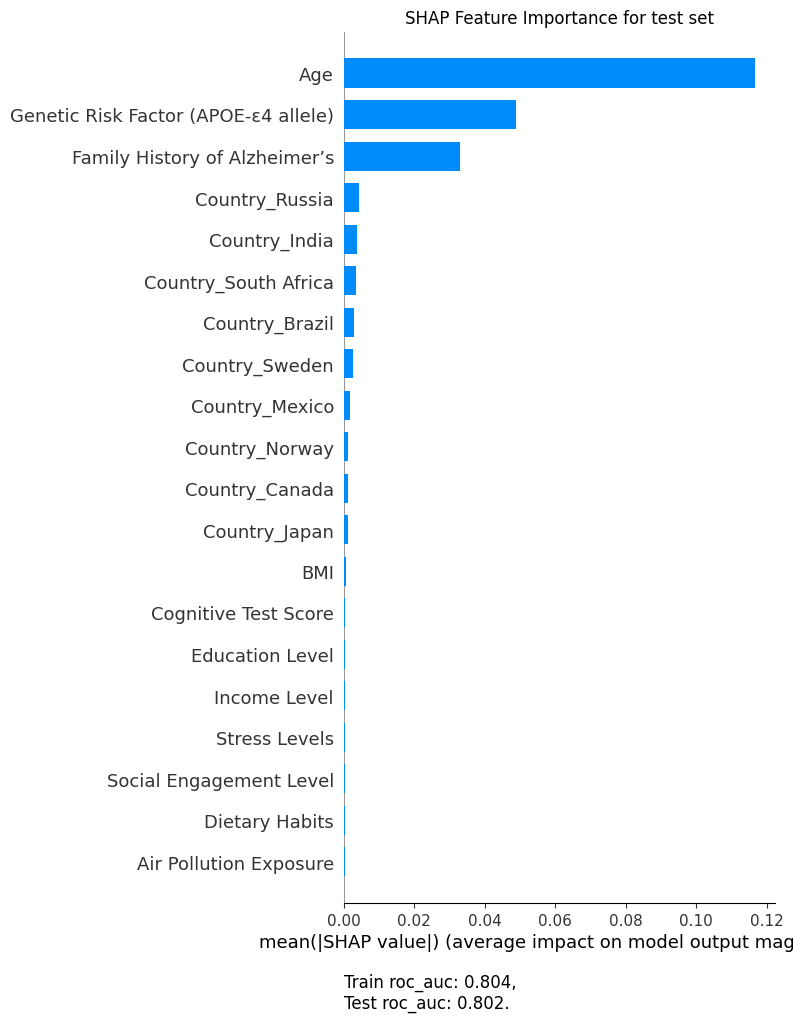

In [54]:
from probatus.interpret import ShapModelInterpreter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X,y, test_size=0.2,random_state=10
)
clf = RandomForestClassifier(n_estimators = 300, random_state=0,max_depth = 6)
clf = clf.fit(X_train, y_train)
shap_interpreter = ShapModelInterpreter(clf)
feature_importance = shap_interpreter.fit_compute(X_train, X_test, y_train, y_test, approximate=False,check_additivity=False)
ax = shap_interpreter.plot('importance')

In [35]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    """
    İki kategorik değişken arasındaki ilişkinin etki büyüklüğünü (effect size)
    0-1 arası bir skor ile ifade eden Cramér’s V değerini hesaplar.
    """
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

def calc_cramers_v_scores(df, target_col, feature_cols):
    
    cramers_results = []
    
    for col in feature_cols:
        confusion = pd.crosstab(df[col], df[target_col])
        
        # Eğer sütun veya hedef sadece tek kategoriden oluşuyorsa Cramér’s V hesaplanamaz
        if confusion.shape[0] < 2 or confusion.shape[1] < 2:
            cv = np.nan
        else:
            cv = cramers_v(confusion)
        
        cramers_results.append((col, cv))
    
    df_cramers = pd.DataFrame(cramers_results, columns=["feature", "cramers_v"])
    df_cramers.sort_values("cramers_v", ascending=False, inplace=True)
    df_cramers.reset_index(drop=True, inplace=True)
    
    return df_cramers

In [36]:
creamer_cols

['Gender',
 'Education Level',
 'Physical Activity Level',
 'Diabetes',
 'Hypertension',
 'Cholesterol Level',
 'Family History of Alzheimer’s',
 'Depression Level',
 'Sleep Quality',
 'Dietary Habits',
 'Air Pollution Exposure',
 'Genetic Risk Factor (APOE-ε4 allele)',
 'Social Engagement Level',
 'Income Level',
 'Stress Levels',
 'Urban vs Rural Living',
 'Alzheimer’s Diagnosis',
 'Country_Argentina',
 'Country_Australia',
 'Country_Brazil',
 'Country_Canada',
 'Country_China',
 'Country_France',
 'Country_Germany',
 'Country_India',
 'Country_Italy',
 'Country_Japan',
 'Country_Mexico',
 'Country_Norway',
 'Country_Russia',
 'Country_Saudi Arabia',
 'Country_South Africa',
 'Country_South Korea',
 'Country_Spain',
 'Country_Sweden',
 'Country_UK',
 'Country_USA',
 'Smoking Status_Current',
 'Smoking Status_Former',
 'Smoking Status_Never',
 'Alcohol Consumption_Never',
 'Alcohol Consumption_Occasionally',
 'Alcohol Consumption_Regularly',
 'Employment Status_Employed',
 'Employment

In [40]:
# Örnek DataFrame: df
# Hedef sütun: "Alzheimer’s Diagnosis"

target_col = "Alzheimer’s Diagnosis"

creamer_cols2 = [col for col in creamer_cols if col != target_col]
# Fonksiyonu çağır
df_cramers = calc_cramers_v_scores(df_test, target_col, creamer_cols2)

# Sonucu inceleyin:
print(df_cramers)

                                 feature  cramers_v
0   Genetic Risk Factor (APOE-ε4 allele)   0.194450
1          Family History of Alzheimer’s   0.140855
2                         Country_Russia   0.042732
3                          Country_India   0.041969
4                   Country_South Africa   0.038270
5                          Country_Japan   0.034630
6                         Country_Brazil   0.034233
7                         Country_Canada   0.033484
8                         Country_Sweden   0.033063
9                         Country_Mexico   0.032581
10                        Country_Norway   0.029605
11                       Education Level   0.020057
12                         Country_China   0.012316
13                           Country_USA   0.011378
14                         Country_Italy   0.009298
15                          Income Level   0.006961
16                         Country_Spain   0.006218
17                        Country_France   0.005953
18      Alco

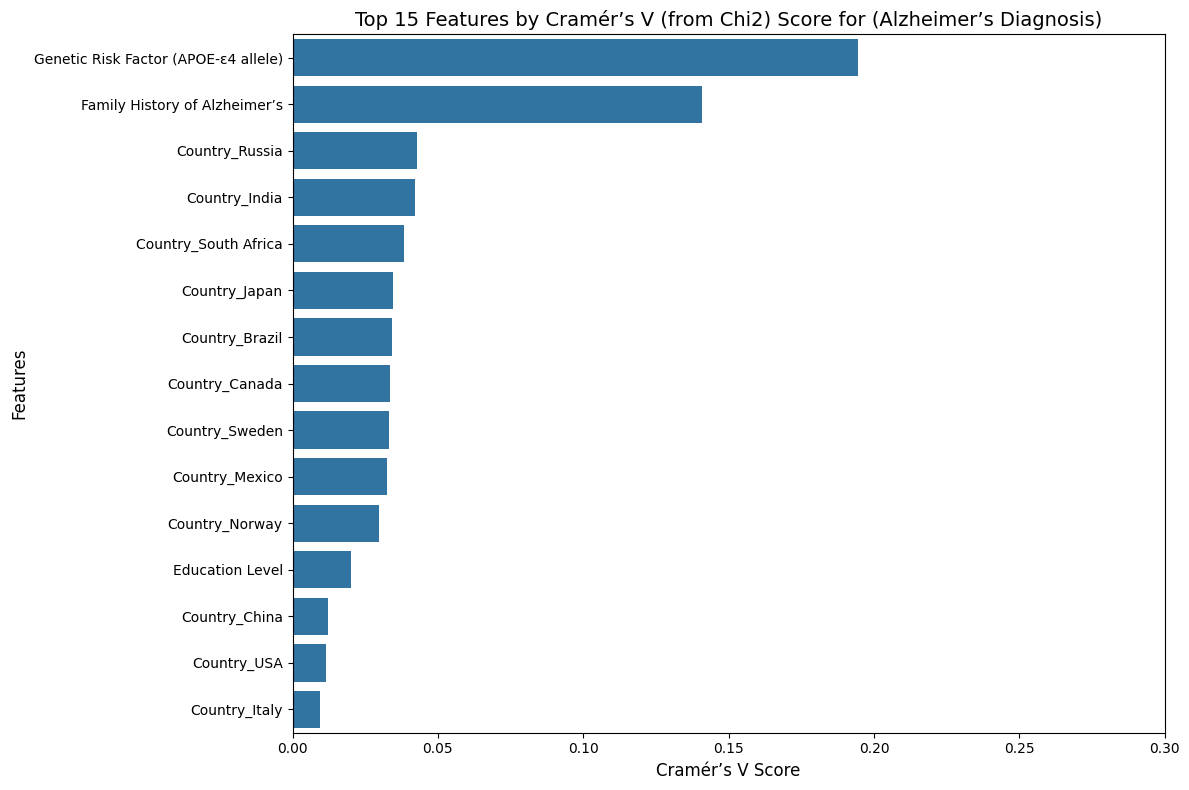

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# NaN değerleri kaldırıp ilk 10 sonucu alalım
df_plot = df_cramers.dropna().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='cramers_v', y='feature', data=df_plot)

plt.title("Top 15 Features by Cramér’s V (from Chi2) Score for (Alzheimer’s Diagnosis)", fontsize=14)
plt.xlabel("Cramér’s V Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xlim(0, 0.3)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def calculate_cramers_v(df, target_col, feature_cols):
    
    def cramers_v(confusion_matrix):
        """Kategorik değişkenler arasındaki etki büyüklüğü için Cramér's V hesaplama."""
        chi2, _, _, _ = chi2_contingency(confusion_matrix)
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        return np.sqrt(phi2 / min(k - 1, r - 1))
    
    cramers_results = []
    
    for col in feature_cols:
        
        confusion = pd.crosstab(df[col], df[target_col])
        
        
        if confusion.shape[0] < 2 or confusion.shape[1] < 2:
            cv = np.nan
        else:
            cv = cramers_v(confusion)
        
        cramers_results.append((col, cv))
    
    # Sonuçları DataFrame'e koyup sıralayalım
    df_cramers = pd.DataFrame(cramers_results, columns=["feature", "cramers_v"])
    df_cramers.sort_values("cramers_v", ascending=False, inplace=True)
    df_cramers.reset_index(drop=True, inplace=True)
    
    return df_cramers

# Seçili özelliklerle fonksiyonu çağır
selected_results = calculate_cramers_v(df_test, target_col, creamer_cols)
print("\nSeçili özellikler için Cramér's V sonuçları:")
print(selected_results)


Seçili özellikler için Cramér's V sonuçları:
                                 feature  cramers_v
0                  Alzheimer’s Diagnosis   0.999972
1   Genetic Risk Factor (APOE-ε4 allele)   0.194450
2          Family History of Alzheimer’s   0.140855
3                         Country_Russia   0.042732
4                          Country_India   0.041969
5                   Country_South Africa   0.038270
6                          Country_Japan   0.034630
7                         Country_Brazil   0.034233
8                         Country_Canada   0.033484
9                         Country_Sweden   0.033063
10                        Country_Mexico   0.032581
11                        Country_Norway   0.029605
12                       Education Level   0.020057
13                         Country_China   0.012316
14                           Country_USA   0.011378
15                         Country_Italy   0.009298
16                          Income Level   0.006961
17                

In [ ]:
for col in cat_cols:
    print(train.groupby(col)[["Transported"]].agg(["mean","count"]))
    print("=======")

In [ ]:
nunique = pd.DataFrame(df.nunique())
nunique.style.background_gradient(cmap="turbo")

,0
Country,20
Age,45
Gender,2
Education Level,20
BMI,166
Physical Activity Level,3
Smoking Status,3
Alcohol Consumption,3
Diabetes,2
Hypertension,2


In [ ]:
target_col

'Alzheimer’s Diagnosis'

In [58]:
point_cols = [col for col in df_test.columns if df_test[col].nunique() > 10]


Point-biserial correlation, bir değişken sürekli (Age, BMI vb.) diğer değişken ikili (0/1) olduğunda, iki değişken arasındaki doğrusal ilişkiyi ölçmek için özel olarak tanımlanmıştır. Python’da scipy kütüphanesindeki pointbiserialr fonksiyonunu kullanabilirsiniz:

In [59]:
from scipy.stats import pointbiserialr

for col in point_cols:
    
    r_value, p_value = pointbiserialr(df_test[col], df_test[target_col])
    print("Point-Biserial Correlation:", r_value)
    print("p-value:", p_value)

Point-Biserial Correlation: 0.41992265021792863
p-value: 0.0
Point-Biserial Correlation: 0.0037321898335641885
p-value: 0.3090624227043949
Point-Biserial Correlation: -0.0017026436506842313
p-value: 0.6426144417195789
Point-Biserial Correlation: -0.0011417359114445319
p-value: 0.7556683968193944


In [60]:
from scipy.stats import pointbiserialr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sonuçları depolayacak liste
results = []

for col in point_cols:
    r_value, p_value = pointbiserialr(df_test[col], df_test[target_col])
    results.append((col, r_value, p_value))

# Sonuçları DataFrame'e çevir
df_pointbiserial = pd.DataFrame(results, columns=["Feature", "Correlation", "p-value"])

# Korelasyonun mutlak değerine göre sırala
df_pointbiserial["abs_corr"] = df_pointbiserial["Correlation"].abs()
df_pointbiserial.sort_values("abs_corr", ascending=False, inplace=True)
df_pointbiserial.reset_index(drop=True, inplace=True)

print(df_pointbiserial.head(10))  # İlk 10 sonucu görmek istersen

                Feature  Correlation   p-value  abs_corr
0                   Age     0.419923  0.000000  0.419923
1       Education Level     0.003732  0.309062  0.003732
2                   BMI    -0.001703  0.642614  0.001703
3  Cognitive Test Score    -0.001142  0.755668  0.001142


/var/folders/80/9ytsrtbj0bgbwgqlkgw86mdc0000gn/T/ipykernel_2000/1424450884.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Correlation", y="Feature", data=df_plot, palette="rocket")


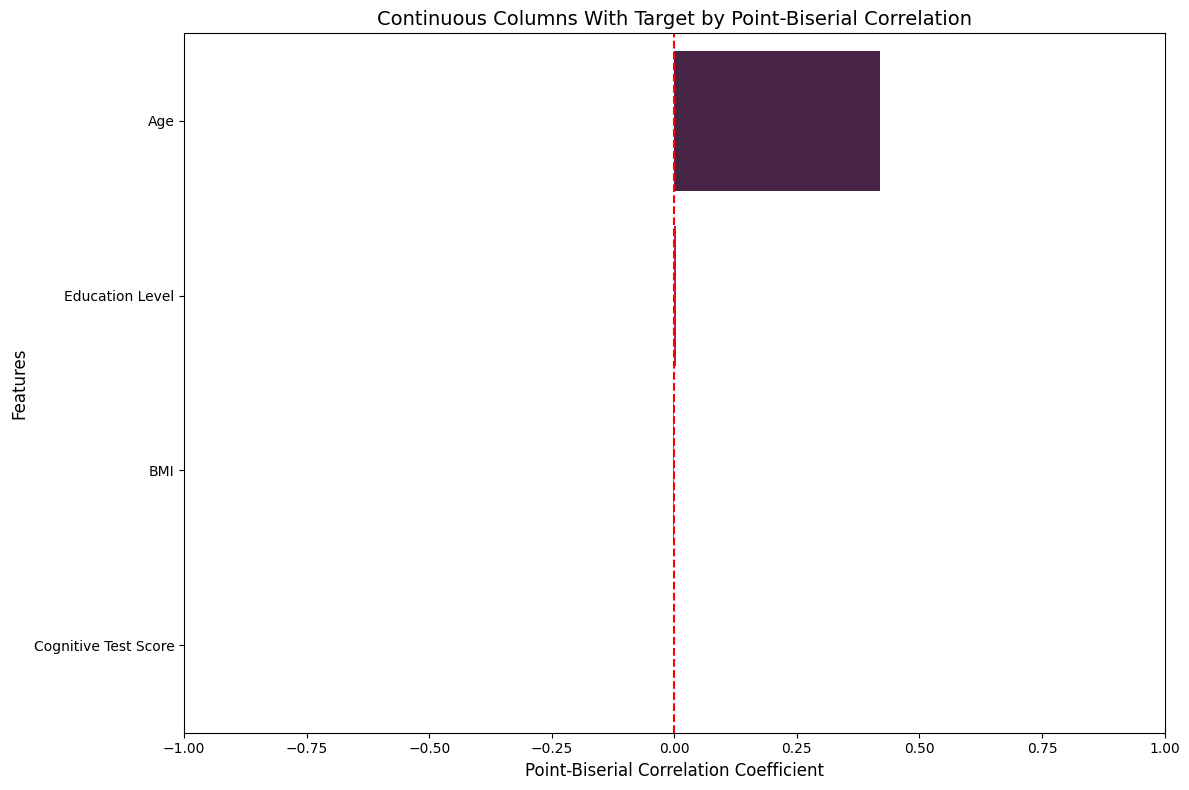

In [67]:
# İlk 20 özellik
df_plot = df_pointbiserial

plt.figure(figsize=(12, 8))
sns.barplot(x="Correlation", y="Feature", data=df_plot, palette="rocket")

plt.title("Continuous Columns With Target by Point-Biserial Correlation", fontsize=14)
plt.xlabel("Point-Biserial Correlation Coefficient", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xlim(-1, 1)
plt.axvline(x=0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import f_classif

          # 0/1 hedef
for col in point_cols:
    f_score, p_value = f_classif(df_test[[col]], df_test[target_col])
    print(f"{col} - F score: {f_score}, p-value: {p_value}")
    

Age - F score: [15902.51259413], p-value: [0.]
Education Level - F score: [1.03469236], p-value: [0.30906242]
BMI - F score: [0.2153409], p-value: [0.64261444]
Cognitive Test Score - F score: [0.09682993], p-value: [0.7556684]


In [ ]:
from scipy.stats import mannwhitneyu

for col in point_cols:
    group0 = df_test[df_test[target_col] == 0][col]
    group1 = df_test[df_test[target_col] == 1][col]
    statistic, p_value = mannwhitneyu(group0, group1)
    print(f"mannwhitneyu-Wallis: {col} stat : {statistic} p_value: {p_value}")

Kruskal-Wallis: Age stat : 339676874.0 p_value: 0.0
Kruskal-Wallis: Education Level stat : 666155160.0 p_value: 0.3084689757075596
Kruskal-Wallis: BMI stat : 670414414.0 p_value: 0.6435750190418291
Kruskal-Wallis: Cognitive Test Score stat : 669977738.0 p_value: 0.755794675361391


In [68]:
from sklearn.feature_selection import f_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = []

for col in point_cols:
    f_score, p_value = f_classif(df_test[[col]], df_test[target_col])
    results.append((col, f_score[0], p_value[0]))

# DataFrame oluştur
df_f_scores = pd.DataFrame(results, columns=["Feature", "F_Score", "p-value"])

# F skorlarına göre sırala
df_f_scores.sort_values("F_Score", ascending=False, inplace=True)
df_f_scores.reset_index(drop=True, inplace=True)

print(df_f_scores.head(10))  # İlk 10 sonucu görmek için

                Feature       F_Score   p-value
0                   Age  15902.512594  0.000000
1       Education Level      1.034692  0.309062
2                   BMI      0.215341  0.642614
3  Cognitive Test Score      0.096830  0.755668


/var/folders/80/9ytsrtbj0bgbwgqlkgw86mdc0000gn/T/ipykernel_2000/2214915247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F_Score", y="Feature", data=df_plot, palette="rocket")


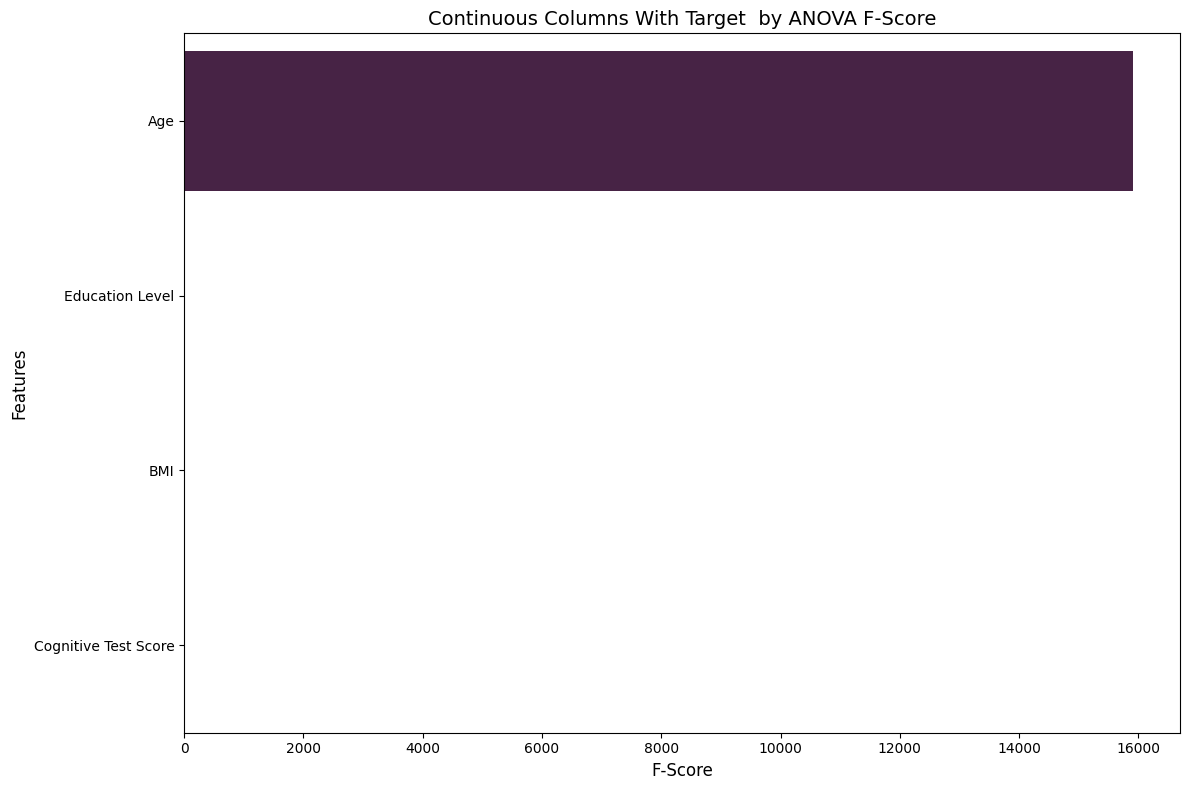

In [116]:
# İlk 20 özellik
df_plot = df_f_scores.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x="F_Score", y="Feature", data=df_plot, palette="rocket")

plt.title("Continuous Columns With Target  by ANOVA F-Score", fontsize=14)
plt.xlabel("F-Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

In [71]:
from scipy.stats import mannwhitneyu
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = []

for col in point_cols:
    group0 = df_test[df_test[target_col] == 0][col]
    group1 = df_test[df_test[target_col] == 1][col]
    
    statistic, p_value = mannwhitneyu(group0, group1)
    results.append((col, statistic, p_value))

# DataFrame oluştur
df_mwu = pd.DataFrame(results, columns=["Feature", "Statistic", "p-value"])

# p-value'a göre sırala (en anlamlıdan başlayarak)
df_mwu.sort_values("p-value", ascending=True, inplace=True)
df_mwu.reset_index(drop=True, inplace=True)

print(df_mwu.head(10))  # ilk 10 sonucu görmek için

                Feature    Statistic   p-value
0                   Age  339676874.0  0.000000
1       Education Level  666155160.0  0.308469
2                   BMI  670414414.0  0.643575
3  Cognitive Test Score  669977738.0  0.755795


/var/folders/80/9ytsrtbj0bgbwgqlkgw86mdc0000gn/T/ipykernel_2000/2959923814.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="p-value", y="Feature", data=df_plot, palette="flare_r")


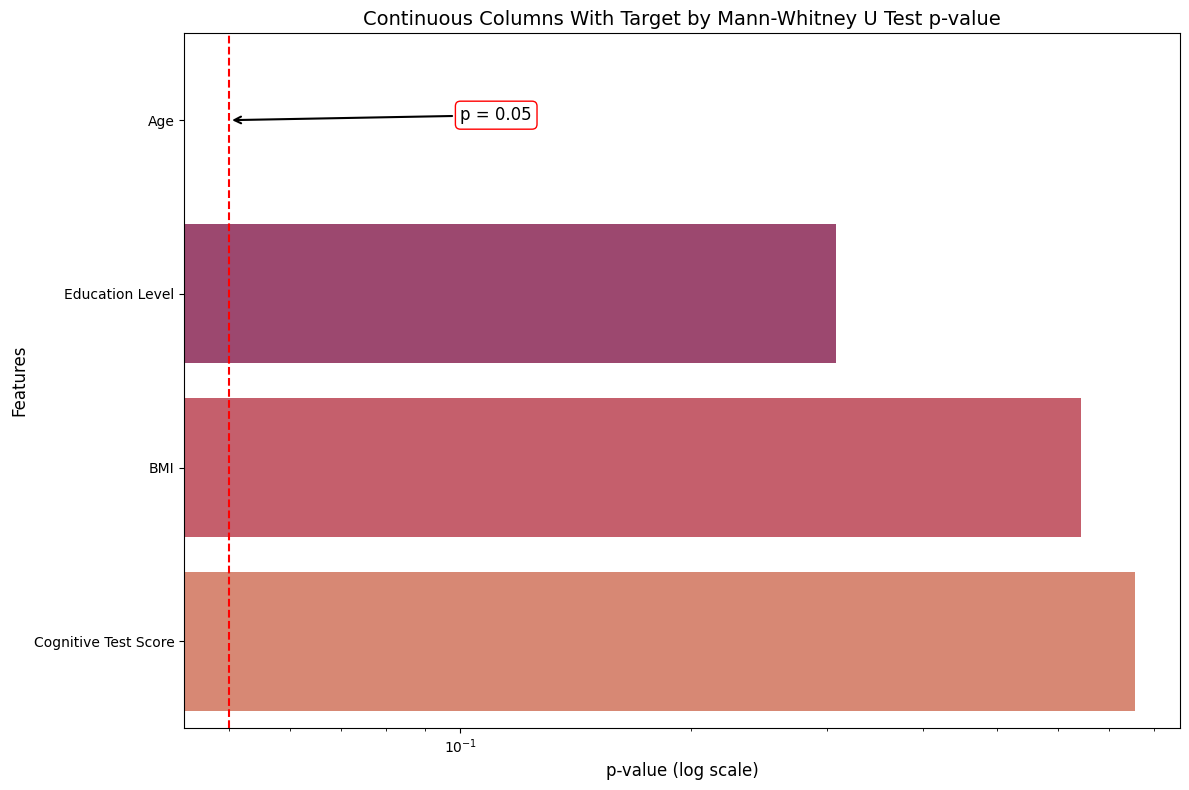

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# İlk 20 özellik
df_plot = df_mwu.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x="p-value", y="Feature", data=df_plot, palette="flare_r")

# p-value = 0.05 için dikey çizgi ekleyelim
plt.axvline(x=0.05, color='red', linestyle='--', linewidth=1.5)

# Ok ve kutu ile net ifade
plt.annotate('p = 0.05',
             xy=(0.05, 0), xycoords='data',
             xytext=(0.1, 0), textcoords='data',
             arrowprops=dict(facecolor='black', arrowstyle="->", lw=1.5),
             fontsize=12, color='black',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white'))

plt.title("Continuous Columns With Target by Mann-Whitney U Test p-value", fontsize=14)
plt.xlabel("p-value (log scale)", fontsize=12)
plt.ylabel("Features", fontsize=12)

plt.xscale('log')
plt.tight_layout()
plt.show()